# Lectura de datos

In [573]:
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [574]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 100)
pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

%config InlineBackend.figure_format = 'retina'

In [575]:
train_default = pd.read_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/Examen_1/train_default.csv', delimiter='|')
train_default.shape

(5625, 25)

In [576]:
train_default.sample(5)

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
4066,26350,"140,000.00",1,1,2,30,0,0,-2,-2,-1,-1,"5,600.00",0.00,0.00,0.00,"5,302.00","10,251.00",0.00,0.00,0.00,"5,302.00","5,251.00",0.00,0
2499,9503,"420,000.00",1,1,2,33,1,-1,-1,-2,-2,-2,-190.00,"6,509.00",0.00,0.00,0.00,0.00,"6,699.00",0.00,0.00,0.00,0.00,0.00,0
5471,22452,"260,000.00",2,5,1,33,0,-1,-1,0,0,0,"3,140.00","2,740.00","107,139.00","105,188.00","104,418.00","106,990.00","2,740.00","107,139.00","4,000.00","4,000.00","4,696.00","5,000.00",0
2226,14539,"250,000.00",1,2,2,27,0,0,0,0,0,0,"34,799.00","25,831.00","24,448.00","20,492.00","18,812.00","17,663.00","2,027.00","2,000.00","1,007.00","1,031.00","2,000.00","10,000.00",0
23,1256,"270,000.00",2,2,1,32,1,2,2,2,2,2,"234,752.00","233,036.00","229,286.00","217,644.00","223,690.00","221,413.00","10,000.00","8,000.00",0.00,"16,000.00","8,000.00",0.00,1


# Análisis Exploratorio de Datos

In [577]:
train_default.describe(percentiles=[0.01, .25, .5, .75, .99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
CUSTOMER_ID,"5,625.00","14,945.57","8,655.94",1.00,288.72,"7,494.00","14,901.00","22,503.00","29,654.28","30,000.00"
LIMIT_BAL,"5,625.00","164,279.11","127,919.46","10,000.00","10,000.00","50,000.00","140,000.00","230,000.00","500,000.00","750,000.00"
SEX,"5,625.00",1.61,0.49,1.00,1.00,1.00,2.00,2.00,2.00,2.00
EDUCATION,"5,625.00",1.85,0.80,0.00,1.00,1.00,2.00,2.00,5.00,6.00
MARRIAGE,"5,625.00",1.56,0.52,0.00,1.00,1.00,2.00,2.00,3.00,3.00
AGE,"5,625.00",35.32,9.24,21.00,22.00,28.00,34.00,41.00,60.00,75.00
PAY_0,"5,625.00",-0.01,1.14,-2.00,-2.00,-1.00,0.00,0.00,3.00,8.00
PAY_2,"5,625.00",-0.13,1.23,-2.00,-2.00,-1.00,0.00,0.00,3.00,8.00
PAY_3,"5,625.00",-0.17,1.22,-2.00,-2.00,-1.00,0.00,0.00,3.00,7.00
PAY_4,"5,625.00",-0.21,1.20,-2.00,-2.00,-1.00,0.00,0.00,3.00,7.00


# Ingeniería de Variables

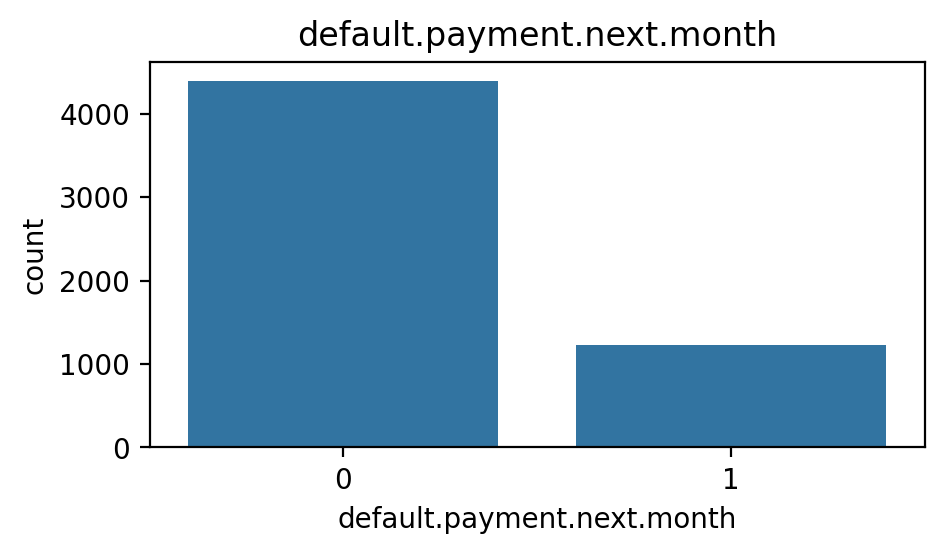

In [578]:
plt.figure(figsize=(5,2.5))
sns.barplot(train_default['default.payment.next.month'].value_counts())
plt.title('default.payment.next.month')
plt.show()

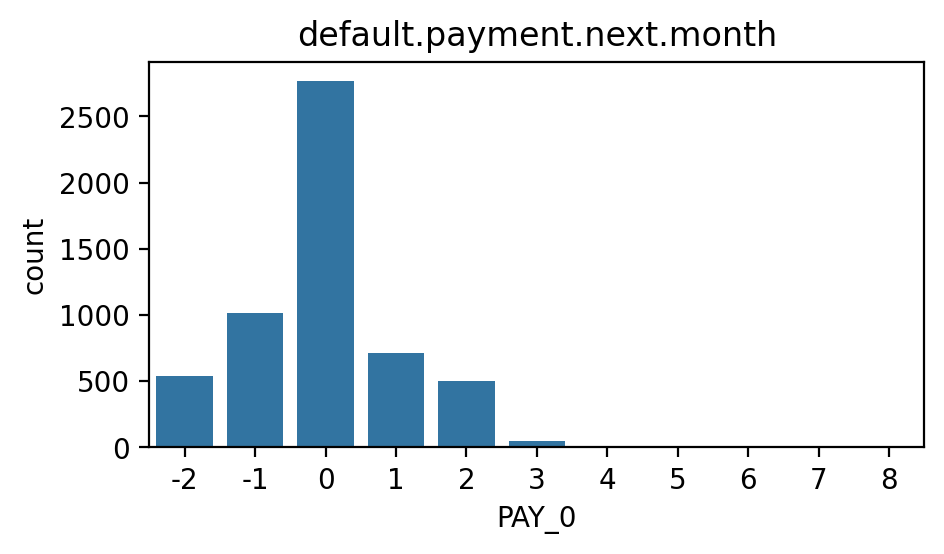

In [617]:
plt.figure(figsize=(5,2.5))
sns.barplot(train_default['PAY_0'].value_counts())
plt.title('default.payment.next.month')
plt.show()

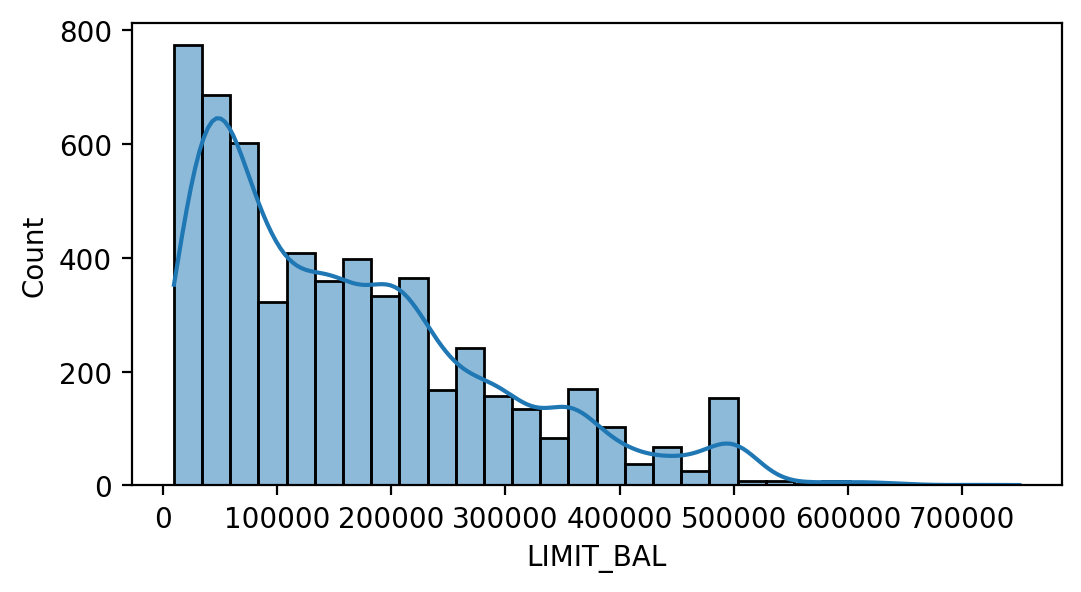

In [579]:
plt.figure(figsize=(6,3))
sns.histplot(train_default['LIMIT_BAL'],kde=True,bins=30)
plt.show()

<Figure size 600x300 with 0 Axes>

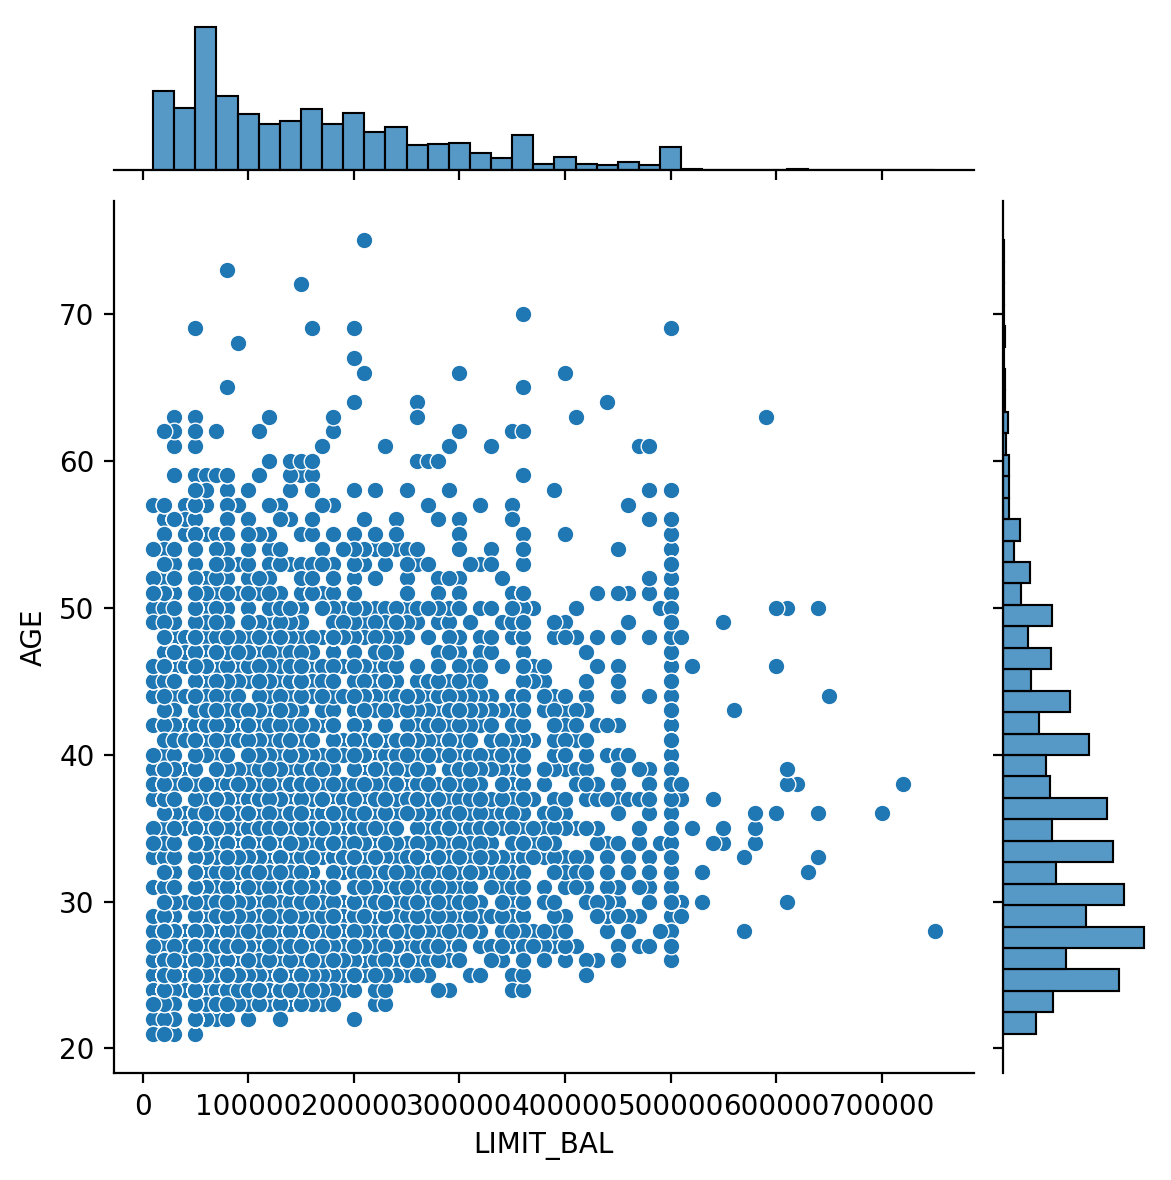

In [580]:
plt.figure(figsize=(6,3))
ax = sns.jointplot(x='LIMIT_BAL',y='AGE',data=train_default,kind="scatter")
plt.show()

# Ingenieria de Variables

In [581]:
# (1=preparatoria, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0=nulo)
display(train_default['EDUCATION'].value_counts().sort_index())
train_default['EDUCATION'].replace({4:0,5:0,6:0}, inplace=True) # clasificacion de valores desconocido
train_default['EDUCATION'].replace({3:2, 2:3}, inplace=True) # cambiamos el orden de los valores, para darle mas peso
display(train_default['EDUCATION'].value_counts().sort_index())

EDUCATION
0       5
1    1979
2    2657
3     895
4      19
5      57
6      13
Name: count, dtype: int64

EDUCATION
0      94
1    1979
2     895
3    2657
Name: count, dtype: int64

In [582]:
# * MARRIAGE: Estatus marital (1=casado, 2=soltero, 3=otros, 0=nulo)
display(train_default['MARRIAGE'].value_counts().sort_index())
train_default['MARRIAGE'].replace({0:2, 3:2}, inplace=True)
display(train_default['MARRIAGE'].value_counts().sort_index())

MARRIAGE
0      10
1    2508
2    3041
3      66
Name: count, dtype: int64

MARRIAGE
1    2508
2    3117
Name: count, dtype: int64

In [583]:
train_default['SEX'] = train_default['SEX'].astype(str)
train_default['EDUCATION'] = train_default['EDUCATION'].astype(str)
train_default['MARRIAGE'] = train_default['MARRIAGE'].astype(str)

In [584]:
train_default[['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2']].describe(percentiles=[0.01, .25, .5, .75, .9, .99]).T

,count,mean,std,min,1%,25%,50%,75%,90%,99%,max
PAY_AMT6,"5,625.00","5,354.91","18,867.06",0.00,0.00,10.00,"1,500.00","4,015.00","9,743.00","85,723.16","528,666.00"
PAY_AMT5,"5,625.00","4,840.99","16,561.48",0.00,0.00,190.00,"1,500.00","4,005.00","9,061.00","60,039.52","417,990.00"
PAY_AMT4,"5,625.00","4,589.50","13,981.75",0.00,0.00,296.00,"1,500.00","4,000.00","9,105.40","61,900.00","330,982.00"
PAY_AMT3,"5,625.00","4,928.85","14,177.63",0.00,0.00,390.00,"1,742.00","4,478.00","9,965.60","60,985.84","325,000.00"
PAY_AMT2,"5,625.00","5,985.49","24,139.35",0.00,0.00,848.00,"2,019.00","5,000.00","10,439.00","73,862.56","1,227,082.00"


In [585]:
train_default[ 'Num_Meses_Con_Retraso' ] = train_default[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2']].apply(lambda row: (row > 0).sum(), axis=1)
train_default[ 'Max_Meses_Con_Retraso' ] = train_default[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2']].apply(lambda row: max(list(filter(lambda x: x > 0, row)), default=0), axis=1)
train_default[ 'Max_Retraso_Reciente' ] = train_default[['PAY_3', 'PAY_2']].apply(lambda row: max(list(filter(lambda x: x > 0,row)), default=0), axis=1)

lst_var_1 = ['Num_Meses_Con_Retraso', 'Max_Meses_Con_Retraso', 'Max_Retraso_Reciente']
# orden de los meses y total de meses de retraso en el pago
train_default[ ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2'] + lst_var_1 ].sample(5)

,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,Num_Meses_Con_Retraso,Max_Meses_Con_Retraso,Max_Retraso_Reciente
1828,0,0,0,0,0,0,0,0
1563,-1,-1,-1,-1,-1,0,0,0
218,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0
1263,-1,0,0,2,2,2,2,2


In [586]:
train_default[['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2']].sample(5)

,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2
3688,"20,710.00","22,032.00","50,221.00","55,390.00","60,800.00"
575,-10.00,-10.00,-10.00,-10.00,-10.00
4926,"75,996.00","74,778.00","79,368.00","94,938.00","93,357.00"
2428,"113,961.00","109,780.00","107,673.00","106,434.00","102,134.00"
3235,"35,659.00","36,396.00","37,264.00","38,151.00","37,038.00"


In [587]:
train_default[ 'Promedio_Deuda_Ultimos_3_Meses' ] = train_default[['BILL_AMT2','BILL_AMT3','BILL_AMT4']].apply(lambda row: row.mean(), axis=1)
train_default[ 'Cambio_Deuda_Reciente' ] = train_default[['BILL_AMT2','BILL_AMT3','BILL_AMT4']].apply(lambda row: row['BILL_AMT2'] - row['BILL_AMT3'], axis=1)
train_default[ 'Suma_Deuda_Total_Historica' ] = train_default[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.sum(), axis=1)
train_default[ 'Max_Deuda_Historica' ] = train_default[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.max(), axis=1)
train_default[ 'Utilizacion_Credito_Actual' ] = train_default.apply(lambda row: (row['BILL_AMT1'] / row['LIMIT_BAL'])*100*row['LIMIT_BAL'], axis=1)
train_default[ 'Prom_porcen_uso_Credito_Actual' ] = train_default.apply(lambda row: (row['BILL_AMT1'] / row['LIMIT_BAL'])*100, axis=1)
train_default[ 'Utilizacion_Credito_Promedio' ] = train_default.apply(lambda row: (row[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum()/ row['LIMIT_BAL']*5)*100 , axis=1)

In [588]:
lst_var_2 = ['Promedio_Deuda_Ultimos_3_Meses', 'Cambio_Deuda_Reciente', 'Suma_Deuda_Total_Historica', 'Max_Deuda_Historica',
                'Utilizacion_Credito_Actual', 'Prom_porcen_uso_Credito_Actual', 'Utilizacion_Credito_Promedio']
train_default[['LIMIT_BAL', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1'] + lst_var_2].sample(5)

,LIMIT_BAL,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2,BILL_AMT1,Promedio_Deuda_Ultimos_3_Meses,Cambio_Deuda_Reciente,Suma_Deuda_Total_Historica,Max_Deuda_Historica,Utilizacion_Credito_Actual,Prom_porcen_uso_Credito_Actual,Utilizacion_Credito_Promedio
125,"410,000.00","240,970.00","308,888.00","371,539.00","411,492.00","425,895.00","429,392.00","402,975.33","14,403.00","1,758,784.00","425,895.00","42,939,200.00",104.73,"2,144.86"
3154,"270,000.00","8,388.00","19,315.00",-54.00,-54.00,"3,326.00",-16.00,"1,072.67","3,380.00","30,921.00","19,315.00","-1,600.00",-0.01,57.26
3870,"140,000.00","74,954.00","74,462.00","79,775.00","130,305.00","132,415.00","141,453.00","114,165.00","2,110.00","491,911.00","132,415.00","14,145,300.00",101.04,"1,756.82"
2585,"150,000.00","146,389.00","141,330.00","137,751.00","118,843.00","125,063.00","129,564.00","127,219.00","6,220.00","669,376.00","146,389.00","12,956,400.00",86.38,"2,231.25"
4997,"360,000.00","146,194.00","140,729.00","137,605.00","131,328.00","124,934.00","118,368.00","131,289.00","-6,394.00","680,790.00","146,194.00","11,836,800.00",32.88,945.54


In [589]:
train_default[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2']].sample(5)

,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2
5372,"1,060.00","2,000.00","1,060.00",0.00,"2,750.00"
5194,"2,500.00","2,588.00","3,000.00","3,000.00","2,370.00"
3091,"3,200.00","3,300.00","3,000.00","3,000.00",0.00
2004,"2,000.00","2,000.00","1,894.00","1,850.00","1,830.00"
1138,"2,000.00","2,000.00","1,000.00","1,000.00","1,030.00"


In [590]:
def get_mean_pay(row):
    m = []
    if row['PAY_AMT6'] > 0:
        m.append( row['BILL_AMT6']/row['PAY_AMT6'] )
    if row['PAY_AMT5'] > 0:
        m.append( row['BILL_AMT5']/row['PAY_AMT5'] )
    if row['PAY_AMT4'] > 0:
        m.append( row['BILL_AMT4']/row['PAY_AMT4'] )
    if row['PAY_AMT3'] > 0:
        m.append( row['BILL_AMT3']/row['PAY_AMT3'] )
    if row['PAY_AMT2'] > 0:
        m.append( row['BILL_AMT2']/row['PAY_AMT2'] )
    
    if len(m) != 0:
        return  sum(m) / len(m)
    
    return 0

In [591]:
train_default['Promedio_Pago_Ultimos_Meses'] = train_default[['PAY_AMT4','PAY_AMT3','PAY_AMT2']].apply(lambda row: row.sum()/3, axis=1)
train_default['Suma_Pagos_Historicos'] = train_default[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2']].apply(lambda row: row.sum(), axis=1)
train_default['Prom_Porcentaje_Pagos_Historicos'] = train_default.apply(lambda row: get_mean_pay(row=row), axis=1)
train_default['Cambio_Pago_Reciente'] = train_default.apply(lambda row: row['PAY_AMT2'] - row['PAY_AMT3'], axis=1)

train_default['Ratio_Pago_Factura_Anterior'] = np.where(train_default['BILL_AMT2'] > 0, (train_default['PAY_AMT2'] / train_default['BILL_AMT2'])*100, 0)

In [592]:
lst_var_3 = ['Promedio_Pago_Ultimos_Meses', 'Suma_Pagos_Historicos', 'Prom_Porcentaje_Pagos_Historicos',
             'Cambio_Pago_Reciente', 'Ratio_Pago_Factura_Anterior']
train_default[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2'] + lst_var_3].sample(5)

,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,Promedio_Pago_Ultimos_Meses,Suma_Pagos_Historicos,Prom_Porcentaje_Pagos_Historicos,Cambio_Pago_Reciente,Ratio_Pago_Factura_Anterior
1798,225.00,0.00,0.00,0.00,103.00,34.33,328.00,0.00,103.00,0.00
338,"2,560.00","2,500.00","40,000.00","3,000.00","1,700.00","14,900.00","49,760.00",16.84,"-1,300.00",3.87
4683,0.00,"4,500.00",0.00,"1,800.00","2,000.00","1,266.67","8,300.00",20.40,200.00,4.23
5020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3042,"1,038.00","1,033.00",998.00,"1,455.00","1,441.00","1,298.00","5,965.00",23.49,-14.00,5.70


In [593]:
train_default[ 'Edad_x_Limite_Credito' ] = train_default.apply(lambda row: row['AGE'] * row['LIMIT_BAL'], axis=1)

In [594]:
lst_var_4 = ['Edad_x_Limite_Credito']
train_default[['AGE', 'LIMIT_BAL'] + lst_var_4].sample(5)

,AGE,LIMIT_BAL,Edad_x_Limite_Credito
1848,43,"180,000.00","7,740,000.00"
3820,48,"400,000.00","19,200,000.00"
815,31,"110,000.00","3,410,000.00"
5287,44,"360,000.00","15,840,000.00"
2208,34,"250,000.00","8,500,000.00"


# Variables

In [595]:
# Unidad muestral
var_um = ['CUSTOMER_ID']

# Variables categoricas
var_cat = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
            'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Variables numericas
var_num = ['LIMIT_BAL','AGE',
           'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
           'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'
            ] #+ lst_var_1 + lst_var_2 + lst_var_3 + lst_var_4


var_tgt = ['default.payment.next.month']

print( len( var_um + var_cat + var_num + var_tgt ) )
print( train_default.shape )

25
(5625, 41)


# Modelado

In [596]:
X = train_default.drop(columns=var_cat)[var_num].join(pd.get_dummies(train_default[var_cat], dtype='int'))

y = train_default[ var_tgt ]

In [597]:
X.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2
0,"30,000.00",29,"28,547.00","29,398.00","29,864.00","30,115.00","15,818.00","13,813.00","1,700.00","1,500.00","1,010.00","1,000.00","1,000.00","1,200.00",0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,"20,000.00",24,"17,147.00","18,264.00","19,145.00","17,322.00","16,989.00","12,699.00","1,700.00","1,500.00",822.00,"1,000.00","1,000.00",500.00,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,"500,000.00",34,"367,463.00","287,148.00","262,173.00","90,450.00","9,685.00","-39,046.00","10,584.00","30,232.00","3,018.00","1,335.00","30,000.00","10,000.00",0,0,0,0,0,0,0,1,0,0,0,1,0,1
3,"240,000.00",25,0.00,587.00,0.00,"2,417.00",0.00,0.00,587.00,0.00,"2,417.00",0.00,0.00,"7,642.00",1,-1,-1,-1,-1,-2,0,1,0,1,0,0,0,1
4,"280,000.00",26,"36,395.00","35,945.00","36,381.00","36,594.00","37,010.00","36,334.00","1,700.00","1,600.00","1,300.00","1,500.00","2,000.00","99,334.00",0,0,0,0,0,0,0,1,0,1,0,0,0,1


In [598]:
y.head()

,default.payment.next.month
0,0
1,0
2,0
3,0
4,0


## Mejores Variables

In [599]:
kb = SelectKBest( k=1, score_func=f_classif )
kb.fit(X, y)
kb.get_feature_names_out()
ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
print(ls_best)
X_train = pd.DataFrame(kb.transform(X), columns=ls_best)
X_train_cols = X_train.columns

y_train = y

['PAY_0']


In [600]:
X_train

,PAY_0
0,0.00
1,0.00
2,0.00
3,1.00
4,0.00
...,...
5620,0.00
5621,0.00
5622,-2.00
5623,0.00


## Escalado de Datos

In [601]:
#mm_x = MinMaxScaler()
#mm_y = MinMaxScaler()

#X_train = mm_x.fit_transform(X)
#y_train = mm_y.fit_transform(y)

## Entrenamiento del modelo

In [602]:
model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [603]:
ls_scores = cross_val_score(cv=3, 
                            estimator=model, 
                            X=X_train, 
                            y=y_train,
                            scoring="roc_auc",
                            n_jobs=-1 )

print(ls_scores)
print(f"mean: {np.mean(ls_scores)}")
print(f"std: {np.std(ls_scores)}")

[0.68473167 0.66359277 0.70373679]
mean: 0.6840204093575633
std: 0.01639643894203177


/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Evaluación del Modelo (Metricas)

In [604]:
y_pred = model.predict(X_train)

In [605]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_train, y_pred)
acc = accuracy_score(y_train, y_pred)
prec = precision_score(y_train, y_pred)
rec = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.79,0.70,0.05,0.09,0.52


In [606]:
target_names = ['0', '1']
print(classification_report(y_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      4396
           1       0.70      0.05      0.09      1229

    accuracy                           0.79      5625
   macro avg       0.74      0.52      0.48      5625
weighted avg       0.77      0.79      0.71      5625



[[4372   24]
 [1173   56]]


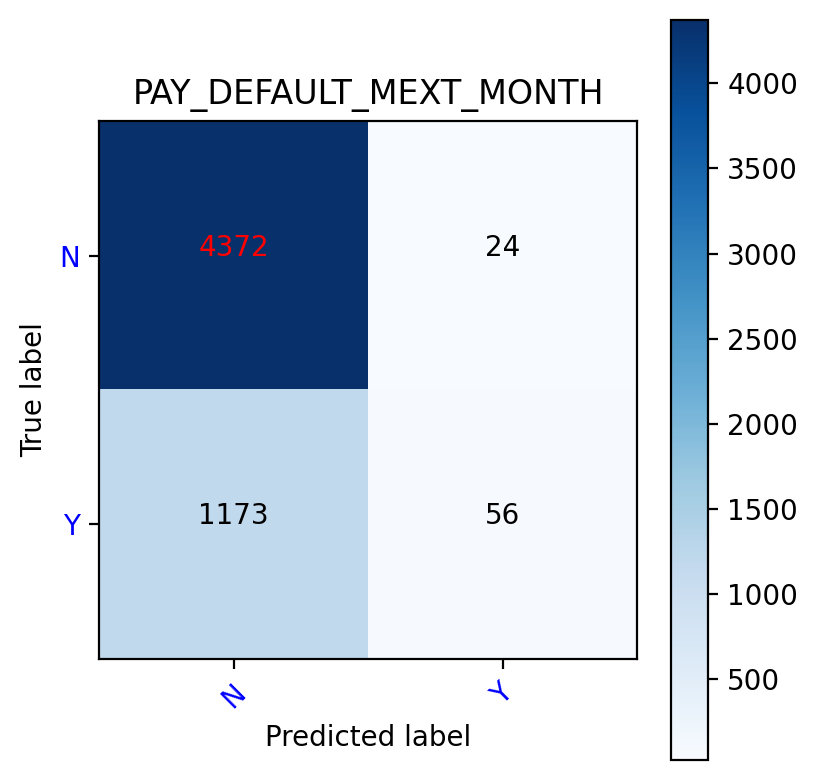

In [607]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    plt.figure(figsize=(4,4))
    plt.rcParams.update({'font.size': 10})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, color="blue")
    plt.yticks(tick_marks, classes, color="blue")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cfm = confusion_matrix(y_train, y_pred=y_pred)
plot_confusion_matrix(cfm, classes=['N','Y'],
                      title='PAY_DEFAULT_MEXT_MONTH')
tn, fp, fn, tp = cfm.ravel()

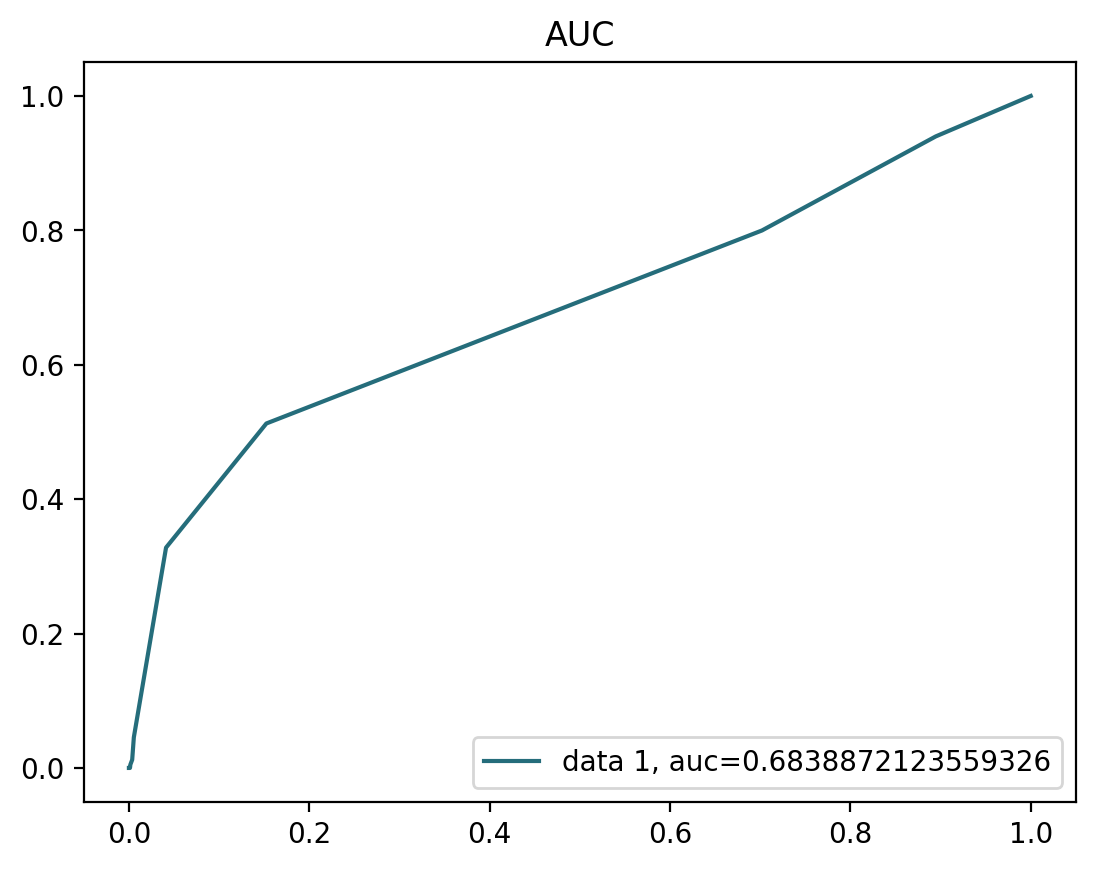

In [608]:
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = roc_curve(y_train,  y_pred_proba)
auc = roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc), color="#256D7B")
plt.legend(loc=4)
plt.title("AUC")
plt.show()

Intercept: [-1.40643719]

Feature Coefficients:
   Feature  Coefficient
0   PAY_0         0.68


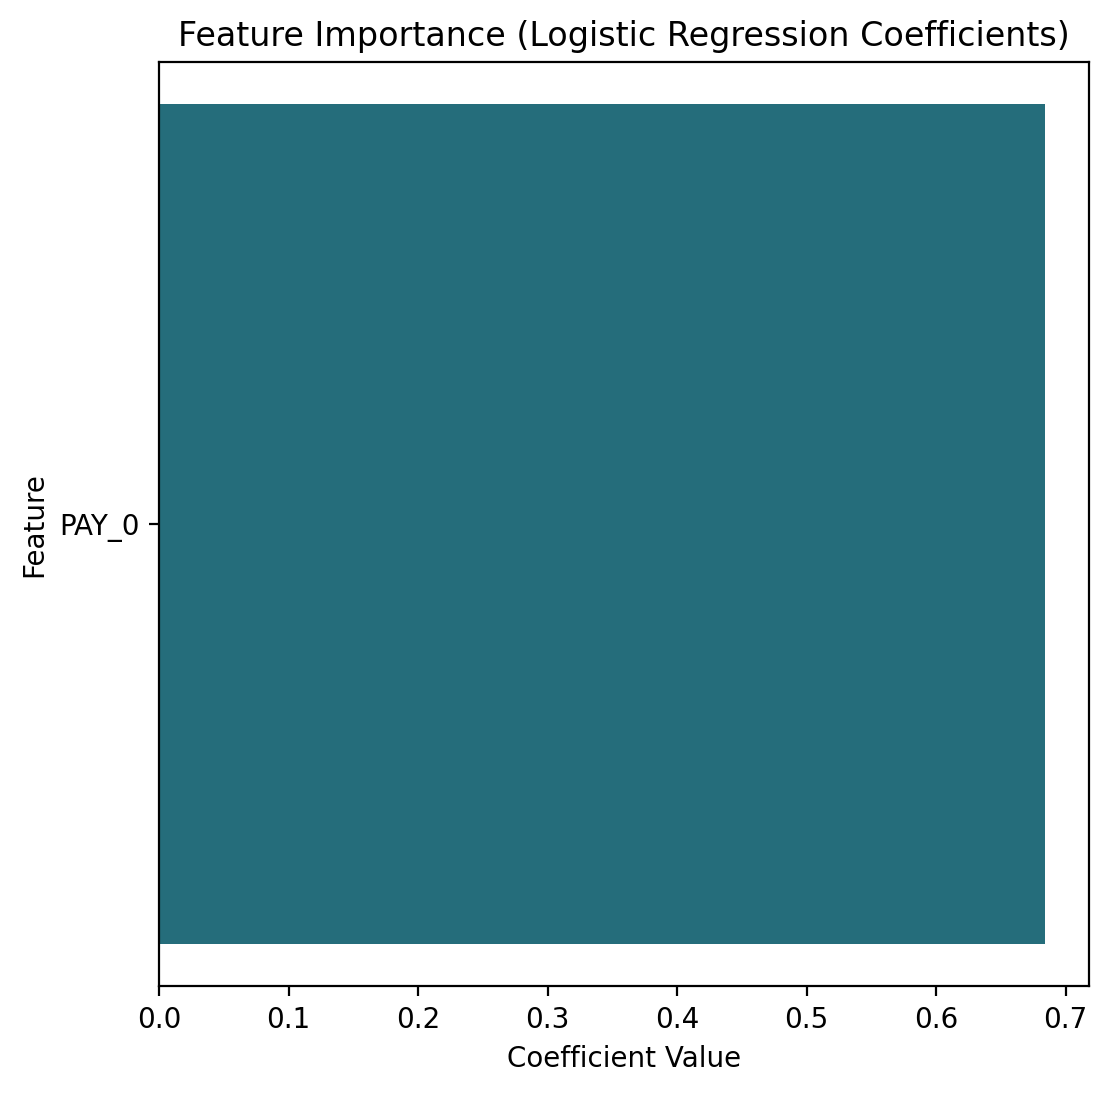

In [609]:
# Extract model info
print("Intercept:", model.intercept_)
coeff_df = pd.DataFrame({"Feature": X_train_cols, "Coefficient": model.coef_[0]})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(6,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient", color="#256D7B")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

In [610]:
#pd.to_pickle(model, "/Users/gblasd/Documents/DataScience/02_SupervisedLearning/notebooks/Exams/BlasDuranGustavo_DefaultPayment.pickle")

In [611]:
def procesar_dataframe( train_default ):
    train_default['EDUCATION'].replace({4:0,5:0,6:0}, inplace=True) # clasificacion de valores desconocido
    train_default['EDUCATION'].replace({3:2, 2:3}, inplace=True) # cambiamos el orden de los valores, para darle mas peso

    train_default['MARRIAGE'].replace({0:2, 3:2}, inplace=True)

    train_default['SEX'] = train_default['SEX'].astype(str)
    train_default['EDUCATION'] = train_default['EDUCATION'].astype(str)
    train_default['MARRIAGE'] = train_default['MARRIAGE'].astype(str)

    train_default[ 'Num_Meses_Con_Retraso' ] = train_default[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2']].apply(lambda row: (row > 0).sum(), axis=1)
    train_default[ 'Max_Meses_Con_Retraso' ] = train_default[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2']].apply(lambda row: max(list(filter(lambda x: x > 0, row)), default=0), axis=1)
    train_default[ 'Max_Retraso_Reciente' ] = train_default[['PAY_3', 'PAY_2']].apply(lambda row: max(list(filter(lambda x: x > 0,row)), default=0), axis=1)

    lst_var_1 = ['Num_Meses_Con_Retraso', 'Max_Meses_Con_Retraso', 'Max_Retraso_Reciente']

    train_default[ 'Promedio_Deuda_Ultimos_3_Meses' ] = train_default[['BILL_AMT2','BILL_AMT3','BILL_AMT4']].apply(lambda row: row.mean(), axis=1)
    train_default[ 'Cambio_Deuda_Reciente' ] = train_default[['BILL_AMT2','BILL_AMT3','BILL_AMT4']].apply(lambda row: row['BILL_AMT2'] - row['BILL_AMT3'], axis=1)
    train_default[ 'Suma_Deuda_Total_Historica' ] = train_default[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.sum(), axis=1)
    train_default[ 'Max_Deuda_Historica' ] = train_default[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.max(), axis=1)
    train_default[ 'Utilizacion_Credito_Actual' ] = train_default.apply(lambda row: (row['BILL_AMT1'] / row['LIMIT_BAL'])*100*row['LIMIT_BAL'], axis=1)
    train_default[ 'Prom_porcen_uso_Credito_Actual' ] = train_default.apply(lambda row: (row['BILL_AMT1'] / row['LIMIT_BAL'])*100, axis=1)
    train_default[ 'Utilizacion_Credito_Promedio' ] = train_default.apply(lambda row: (row[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum()/ row['LIMIT_BAL']*5)*100 , axis=1)

    lst_var_2 = ['Promedio_Deuda_Ultimos_3_Meses', 'Cambio_Deuda_Reciente', 'Suma_Deuda_Total_Historica', 'Max_Deuda_Historica',
                'Utilizacion_Credito_Actual', 'Prom_porcen_uso_Credito_Actual', 'Utilizacion_Credito_Promedio']
    
    train_default['Promedio_Pago_Ultimos_Meses'] = train_default[['PAY_AMT4','PAY_AMT3','PAY_AMT2']].apply(lambda row: row.sum()/3, axis=1)
    train_default['Suma_Pagos_Historicos'] = train_default[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2']].apply(lambda row: row.sum(), axis=1)
    train_default['Prom_Porcentaje_Pagos_Historicos'] = train_default.apply(lambda row: get_mean_pay(row=row), axis=1)
    train_default['Cambio_Pago_Reciente'] = train_default.apply(lambda row: row['PAY_AMT2'] - row['PAY_AMT3'], axis=1)
    train_default['Ratio_Pago_Factura_Anterior'] = np.where(train_default['BILL_AMT2'] > 0, (train_default['PAY_AMT2'] / train_default['BILL_AMT2'])*100, 0)

    lst_var_3 = ['Promedio_Pago_Ultimos_Meses', 'Suma_Pagos_Historicos', 'Prom_Porcentaje_Pagos_Historicos',
             'Cambio_Pago_Reciente', 'Ratio_Pago_Factura_Anterior']
    
    train_default[ 'Edad_x_Limite_Credito' ] = train_default.apply(lambda row: row['AGE'] * row['LIMIT_BAL'], axis=1)

    lst_var_4 = ['Edad_x_Limite_Credito']

    train_default['PAY_0'] = train_default['PAY_0'].map(lambda x: x if x > 0 else 0)
    train_default['PAY_2'] = train_default['PAY_2'].map(lambda x: x if x > 0 else 0)
    train_default['PAY_3'] = train_default['PAY_3'].map(lambda x: x if x > 0 else 0)
    train_default['PAY_4'] = train_default['PAY_4'].map(lambda x: x if x > 0 else 0)
    train_default['PAY_5'] = train_default['PAY_5'].map(lambda x: x if x > 0 else 0)
    train_default['PAY_6'] = train_default['PAY_6'].map(lambda x: x if x > 0 else 0)

    # Unidad muestral
    var_um = ['CUSTOMER_ID']

    # Variables categoricas
    var_cat = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
                'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

    # Variables numericas
    var_num = ['LIMIT_BAL','AGE',
            'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
            'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'
                ] + lst_var_1 + lst_var_2 + lst_var_3 + lst_var_4
    
    X = train_default.drop(columns=var_cat)[var_um + var_num].join(pd.get_dummies(train_default[var_cat], dtype='int'))

    return X

#ls_best = ['LIMIT_BAL', 'Num_Meses_Con_Retraso', 'Max_Meses_Con_Retraso', 'Max_Retraso_Reciente', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

val_default = pd.read_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/Examen_1/val_default.csv', delimiter='|')
val_default = procesar_dataframe(val_default)[['CUSTOMER_ID'] + ls_best]
print( val_default.shape )
val_default.head()

(1875, 2)


,CUSTOMER_ID,PAY_0
0,16687,0
1,9926,0
2,29451,1
3,14803,0
4,14536,3


In [612]:
results = pd.DataFrame(
    {'CUSTOMER_ID': val_default['CUSTOMER_ID'],
    'y_hat':  model.predict( val_default[ ls_best ] )}
)

In [613]:
results

,CUSTOMER_ID,y_hat
0,16687,0
1,9926,0
2,29451,0
3,14803,0
4,14536,1
...,...,...
1870,15050,0
1871,18104,0
1872,4497,0
1873,23239,0


In [614]:
results['y_hat'].value_counts()

y_hat
0    1852
1      23
Name: count, dtype: int64

In [615]:
#results.to_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/notebooks/Exams/BlasDuranGustavo_DefaultPayment.csv', index=False)

In [616]:
results

,CUSTOMER_ID,y_hat
0,16687,0
1,9926,0
2,29451,0
3,14803,0
4,14536,1
...,...,...
1870,15050,0
1871,18104,0
1872,4497,0
1873,23239,0
